## 텍스트 전처리 
-----
- 패키지 설치
    - NLTK : pip install nltk

In [1]:
# nltk 패키지 설치
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
# 모듈 로딩
import nltk
import konlpy
# NLTK 말뭉치 데이터셋 다운받기
nltk.download('all')  # 14분 정도 소요

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]    | Do

True

### 토큰화
- 문장, 문서를 의미를 가진 작은 단위로 나누는 것
- 나누어진 단어를 토큰(Token)이라 함
- 종류 
    - 문장 토큰화
    - 단어 토큰화

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
s = """There are numerous ways to tokenize text. If you need more control over tokenization, see the other methods provided in this package."""
s2 = "Tokenizers divide strings into lists of substrings. For example, tokenizers can be used to find the words and punctuation in a string:"
s3 = "This particular tokenizer requires the Punkt sentence tokenization models to be installed. NLTK also provides a simpler, regular-expression based tokenizer, which splits text on whitespace and punctuation:"
result1 = word_tokenize(s)
print(result1)

['There', 'are', 'numerous', 'ways', 'to', 'tokenize', 'text', '.', 'If', 'you', 'need', 'more', 'control', 'over', 'tokenization', ',', 'see', 'the', 'other', 'methods', 'provided', 'in', 'this', 'package', '.']


In [3]:
sent_result = sent_tokenize(s+s2+s3)
print(sent_result)

['There are numerous ways to tokenize text.', 'If you need more control over tokenization, see the other methods provided in this package.Tokenizers divide strings into lists of substrings.', 'For example, tokenizers can be used to find the words and punctuation in a string:This particular tokenizer requires the Punkt sentence tokenization models to be installed.', 'NLTK also provides a simpler, regular-expression based tokenizer, which splits text on whitespace and punctuation:']


### 여러 문장에 토큰 추출
---
sent_tokenize -> word_tokenize 순서

In [5]:
# 문장 단위로 추출
sl = [s, s2, s3]
total_token=[]
for sent in sl:
    # 문장 추출
    sent_result = sent_tokenize(sent)
    # 문장에서 추출한 토큰
    for ele in sent_result:

        word_token = word_tokenize(ele)
    # 모든 문장 토큰에 추가
        total_token.append(word_token)
print(total_token)

[['There', 'are', 'numerous', 'ways', 'to', 'tokenize', 'text', '.'], ['If', 'you', 'need', 'more', 'control', 'over', 'tokenization', ',', 'see', 'the', 'other', 'methods', 'provided', 'in', 'this', 'package', '.'], ['Tokenizers', 'divide', 'strings', 'into', 'lists', 'of', 'substrings', '.'], ['For', 'example', ',', 'tokenizers', 'can', 'be', 'used', 'to', 'find', 'the', 'words', 'and', 'punctuation', 'in', 'a', 'string', ':'], ['This', 'particular', 'tokenizer', 'requires', 'the', 'Punkt', 'sentence', 'tokenization', 'models', 'to', 'be', 'installed', '.'], ['NLTK', 'also', 'provides', 'a', 'simpler', ',', 'regular-expression', 'based', 'tokenizer', ',', 'which', 'splits', 'text', 'on', 'whitespace', 'and', 'punctuation', ':']]


### Konlpy
- 한국어 정보처리를 위한 파이썬 패키지
- 단어를 형태소 단위로 분리하는 Java 기반 SW
- 한나눔, 꼬꼬마, Okt 등

In [7]:
from konlpy.tag import Okt
okt = Okt()
result = okt.morphs("오늘은 월요일입니다.")
print(result)

['오늘', '은', '월요일', '입니다', '.']


In [9]:
# 형태소 분리 후 태깅
result2 = okt.pos("오늘은 월요일입니다.")
print(result2)

[('오늘', 'Noun'), ('은', 'Josa'), ('월요일', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]


In [10]:
# 태깅 + 어간 추출
result3 = okt.pos("오늘은 월요일입니다.", stem=True)
print(result3)

[('오늘', 'Noun'), ('은', 'Josa'), ('월요일', 'Noun'), ('이다', 'Adjective'), ('.', 'Punctuation')]


### 정제 & 정규화
- 불용어 제거 -> 노이즈 제거
- 텍스트의 동일화 -> 대소문자 통일, 문장의 길이 비슷하게

### 불용어 (Stopword)
- 사용법 : nltk.corpus.stopwords.words()

In [25]:
sw = nltk.corpus.stopwords.words("english")

In [24]:
print(len(nltk.corpus.stopwords.words("english")))

179


### 어간 및 표제어
- stemming -> 어간 추출 : 단어의 의미를 담고있는 단어의 핵심 부분
- Lemmatization -> 표제어 추출 : 기본 사전형 단어 의미

In [50]:
# stemming
from nltk.stem import StemmerI, WordNetLemmatizer, LancasterStemmer
st = LancasterStemmer()  # 어간 추출
st2 = WordNetLemmatizer() # 표제어 추출

print(st.stem("amusing"))
print(st.stem("amused"))
print(st.stem("happier"))
print(st.stem("memories"))
print(st.stem("datum"))
print(st2.lemmatize("amusing"))
print(st2.lemmatize("amused"))
print(st2.lemmatize("happier"))
print(st2.lemmatize("memories"))
print(st2.lemmatize("datum"))

amus
amus
happy
mem
dat
amusing
amused
happier
memory
datum


In [58]:
# pos를 지정해서 품사를 바꿀 수 있다. 
print(st2.lemmatize("amusing", pos='v'))
print(st2.lemmatize("amused", pos='v'))
print(st2.lemmatize("happier", pos='s'))
print(st2.lemmatize("memories", pos='n'))
print(st2.lemmatize("datum"))

amuse
amuse
happy
memory
datum


### Bag of Word(BOW)
- 단순 카운트 기반 벡터화
- TF-IDF (Term Frequency-Inverse Document Frequency)
    - 특정 단어가 다른 문서에는 나타나지 않고 특정 문서에만 자주 사용
    - TF : 문서에 얼마나 자주 나타났는지 지표
    - DF : 해당 단어가 몇개의 문서에 나타났는지 지표
    - IDF : 문서수/DF
    - TF가 높고 IDF가 낮으면 가중치를 높게
    - 반대로, TF가 낮고 IDF가 높으면 가중치를 낮게
- TF-IDF 단점: 단어가 많을 경우에 거대한 희소행렬이 나와서 메모리 낭비가 심각
- 텍스트 수치화 (Text Vectorization) 
    - Word Embedding(Word2Vec)
        - 개별 단어를 문맥을 가진 N차원 공간에 벡터로 표현
        - 같은 의미를 가진 단어가 비슷한 표현을 갖는 n차원 공간에 위치


<AxesSubplot:>

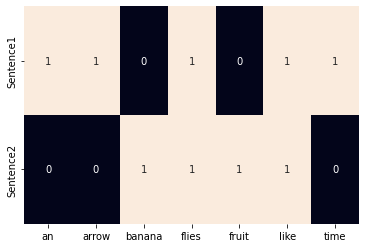

In [63]:
# BOW
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
corpus = ['Time flies like an arrow.', 'Fruit flies like a banana']
one_hot_vec = CountVectorizer(binary=True)
one_hot = one_hot_vec.fit_transform(corpus).toarray()
vocab = one_hot_vec.get_feature_names_out()
sns.heatmap(one_hot, annot=True, cbar=False, xticklabels=vocab, yticklabels=['Sentence1', 'Sentence2'])

<AxesSubplot:>

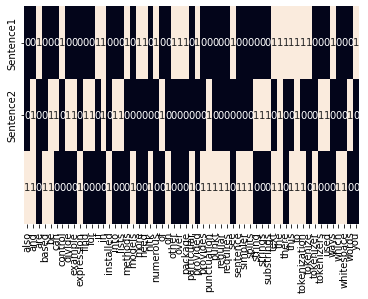

In [64]:
corpus = [s,s2,s3]
one_hot_vec = CountVectorizer(binary=True)
one_hot = one_hot_vec.fit_transform(corpus).toarray()
vocab = one_hot_vec.get_feature_names_out()
sns.heatmap(one_hot, annot=True, cbar=False, xticklabels=vocab, yticklabels=['Sentence1', 'Sentence2'])

In [ ]:
# spacy 설치
%pip install -U pip setuptools wheel
%pip install -U spacy
%python -m spacy download en_core_web_sm

In [70]:
import spacy
sent='''Wiki is in Ward is original description: The simplest online database that could possibly work.\
Wiki is a piece of server software that allows users to freely create and edit Web page content using any Web browser. Wiki supports hyperlinks and has a simple text syntax for creating new pages and crosslinks between internal pages on the fly.\
Wiki is unusual among group communication mechanisms in that it allows the organization of contributions to be edited in addition to the content itself.Like many simple concepts, "open editing" has some profound and subtle effects on Wiki usage. Allowing everyday users to create and edit any page in a Web site is exciting in that it encourages democratic use of the Web and promotes content composition by nontechnical users.'''
res_word = word_tokenize(sent)
res_sent = sent_tokenize(sent)

In [74]:
len(res_word), len(res_sent)

(132, 3)

In [78]:
# 불용어를 제거하니까 132개 -> 85개로 단어 감소
res_word_sw = [i for i in res_word if i not in sw]
len(res_word_sw)

85

In [84]:
nltk.pos_tag(res_word_sw)

[('Wiki', 'NNP'),
 ('Ward', 'NNP'),
 ('original', 'JJ'),
 ('description', 'NN'),
 (':', ':'),
 ('The', 'DT'),
 ('simplest', 'JJS'),
 ('online', 'JJ'),
 ('database', 'NN'),
 ('could', 'MD'),
 ('possibly', 'RB'),
 ('work.Wiki', 'VB'),
 ('piece', 'NN'),
 ('server', 'NN'),
 ('software', 'NN'),
 ('allows', 'VBZ'),
 ('users', 'NNS'),
 ('freely', 'RB'),
 ('create', 'VBP'),
 ('edit', 'JJ'),
 ('Web', 'NNP'),
 ('page', 'NN'),
 ('content', 'NN'),
 ('using', 'VBG'),
 ('Web', 'NNP'),
 ('browser', 'NN'),
 ('.', '.'),
 ('Wiki', 'NNP'),
 ('supports', 'VBZ'),
 ('hyperlinks', 'NNS'),
 ('simple', 'JJ'),
 ('text', 'JJ'),
 ('syntax', 'NN'),
 ('creating', 'VBG'),
 ('new', 'JJ'),
 ('pages', 'NNS'),
 ('crosslinks', 'VBP'),
 ('internal', 'JJ'),
 ('pages', 'NNS'),
 ('fly.Wiki', 'VBP'),
 ('unusual', 'JJ'),
 ('among', 'IN'),
 ('group', 'NN'),
 ('communication', 'NN'),
 ('mechanisms', 'NNS'),
 ('allows', 'VBZ'),
 ('organization', 'NN'),
 ('contributions', 'NNS'),
 ('edited', 'VBD'),
 ('addition', 'NN'),
 ('content

### Tokenizer 객체 생성
- texts_to_sequences()
- OOV : out of word - 기존의 조사한 문장에 없는 경우로 주로 1번으로 배치
- 나머지 단어는 차례대로 2번부터~ 배치

In [3]:
%pip install --user --upgrade tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [7]:
from keras.preprocessing.text import text_to_word_sequence, Tokenizer

sent='''Wiki is in Ward is original description: The simplest online database that could possibly work.\
Wiki is a piece of server software that allows users to freely create and edit Web page content using any Web browser. Wiki supports hyperlinks and has a simple text syntax for creating new pages and crosslinks between internal pages on the fly.\
Wiki is unusual among group communication mechanisms in that it allows the organization of contributions to be edited in addition to the content itself.Like many simple concepts, "open editing" has some profound and subtle effects on Wiki usage. Allowing everyday users to create and edit any page in a Web site is exciting in that it encourages democratic use of the Web and promotes content composition by nontechnical users.'''

In [2]:
tokens = text_to_word_sequence(sent)
print(len(tokens), tokens)

128 ['wiki', 'is', 'in', 'ward', 'is', 'original', 'description', 'the', 'simplest', 'online', 'database', 'that', 'could', 'possibly', 'work', 'wiki', 'is', 'a', 'piece', 'of', 'server', 'software', 'that', 'allows', 'users', 'to', 'freely', 'create', 'and', 'edit', 'web', 'page', 'content', 'using', 'any', 'web', 'browser', 'wiki', 'supports', 'hyperlinks', 'and', 'has', 'a', 'simple', 'text', 'syntax', 'for', 'creating', 'new', 'pages', 'and', 'crosslinks', 'between', 'internal', 'pages', 'on', 'the', 'fly', 'wiki', 'is', 'unusual', 'among', 'group', 'communication', 'mechanisms', 'in', 'that', 'it', 'allows', 'the', 'organization', 'of', 'contributions', 'to', 'be', 'edited', 'in', 'addition', 'to', 'the', 'content', 'itself', 'like', 'many', 'simple', 'concepts', 'open', 'editing', 'has', 'some', 'profound', 'and', 'subtle', 'effects', 'on', 'wiki', 'usage', 'allowing', 'everyday', 'users', 'to', 'create', 'and', 'edit', 'any', 'page', 'in', 'a', 'web', 'site', 'is', 'exciting', '

In [3]:
# 정수인코딩(BOW)
myToken = Tokenizer()
myToken.fit_on_texts(tokens)
print(myToken.word_index)

{'and': 1, 'wiki': 2, 'is': 3, 'in': 4, 'the': 5, 'that': 6, 'to': 7, 'web': 8, 'a': 9, 'of': 10, 'users': 11, 'content': 12, 'allows': 13, 'create': 14, 'edit': 15, 'page': 16, 'any': 17, 'has': 18, 'simple': 19, 'pages': 20, 'on': 21, 'it': 22, 'ward': 23, 'original': 24, 'description': 25, 'simplest': 26, 'online': 27, 'database': 28, 'could': 29, 'possibly': 30, 'work': 31, 'piece': 32, 'server': 33, 'software': 34, 'freely': 35, 'using': 36, 'browser': 37, 'supports': 38, 'hyperlinks': 39, 'text': 40, 'syntax': 41, 'for': 42, 'creating': 43, 'new': 44, 'crosslinks': 45, 'between': 46, 'internal': 47, 'fly': 48, 'unusual': 49, 'among': 50, 'group': 51, 'communication': 52, 'mechanisms': 53, 'organization': 54, 'contributions': 55, 'be': 56, 'edited': 57, 'addition': 58, 'itself': 59, 'like': 60, 'many': 61, 'concepts': 62, 'open': 63, 'editing': 64, 'some': 65, 'profound': 66, 'subtle': 67, 'effects': 68, 'usage': 69, 'allowing': 70, 'everyday': 71, 'site': 72, 'exciting': 73, 'enc

In [4]:
print(myToken.word_counts)

OrderedDict([('wiki', 5), ('is', 5), ('in', 5), ('ward', 1), ('original', 1), ('description', 1), ('the', 5), ('simplest', 1), ('online', 1), ('database', 1), ('that', 4), ('could', 1), ('possibly', 1), ('work', 1), ('a', 3), ('piece', 1), ('of', 3), ('server', 1), ('software', 1), ('allows', 2), ('users', 3), ('to', 4), ('freely', 1), ('create', 2), ('and', 6), ('edit', 2), ('web', 4), ('page', 2), ('content', 3), ('using', 1), ('any', 2), ('browser', 1), ('supports', 1), ('hyperlinks', 1), ('has', 2), ('simple', 2), ('text', 1), ('syntax', 1), ('for', 1), ('creating', 1), ('new', 1), ('pages', 2), ('crosslinks', 1), ('between', 1), ('internal', 1), ('on', 2), ('fly', 1), ('unusual', 1), ('among', 1), ('group', 1), ('communication', 1), ('mechanisms', 1), ('it', 2), ('organization', 1), ('contributions', 1), ('be', 1), ('edited', 1), ('addition', 1), ('itself', 1), ('like', 1), ('many', 1), ('concepts', 1), ('open', 1), ('editing', 1), ('some', 1), ('profound', 1), ('subtle', 1), ('ef

In [6]:
# 텍스트를 숫자로 바꾸는 함수 : texts_to_sequences
myToken.texts_to_sequences('and')

[[9], [], []]

-----
- 제공한 문서/문장에 대한 단어사전(Voca)
- 단어사전(voca)에 존재하지 않는 단어 -> Out of Voca (OOV)

### 패딩(padding)
### 임베딩(imbedding)

In [9]:
sentences = [
  'I love my dog',
  'I love my cat',
  'You love my dog!',
  'Do you think my dog is amazing?'
]

In [21]:
tk = Tokenizer()
tk.fit_on_texts(sentences)
print(tk.word_index)
print(tk.word_counts)
# 문장에서 생성된 사전(voca)을 기반으로 수치화
print(tk.texts_to_sequences(sentences))

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
OrderedDict([('i', 2), ('love', 3), ('my', 4), ('dog', 3), ('cat', 1), ('you', 2), ('do', 1), ('think', 1), ('is', 1), ('amazing', 1)])
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


In [36]:
# num_words = 문장에서 생성된 사전(voca)에서 개수 제한
# oov_token = 사전에 없는 값들에 번호 할당
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

tk = Tokenizer(num_words=3+1, oov_token=1)
tk.fit_on_texts(sentences)
print(tk.word_index)
print(tk.texts_to_sequences(sentences))

{1: 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[1, 3, 2, 1], [1, 3, 2, 1], [1, 3, 2, 1], [1, 1, 1, 2, 1, 1, 1]]


### One-Hot Encoding으로 변환
- scikit-learn, keras 모두에 존재

In [48]:
tk = Tokenizer()
tk.fit_on_texts(sentences)
print(tk.word_index)
print(max(tk.word_index.values()))
print(tk.texts_to_sequences(sentences))

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
10
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


In [53]:
from keras.utils import to_categorical
m = np.array(tk.texts_to_sequences(sentences))
to_categorical(m[0])

C:\Users\User\AppData\Local\Temp\ipykernel_8120\2899155116.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  m = np.array(tk.texts_to_sequences(sentences))


array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [54]:
tk.texts_to_matrix(sentences)

array([[0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.]])

### 자연어 처리 실습

In [120]:
# 데이터 불러오기 
with open("./en-1.txt", mode='r', encoding='utf-8') as f:
    a = f.read()

In [126]:
from nltk import word_tokenize, sent_tokenize
b = [i.strip() for i in sent_tokenize(a)]

In [130]:
b = [word_tokenize(i) for i in b]

In [131]:
# 토큰화
tk = Tokenizer()
tk.fit_on_texts(b)
print(len(tk.word_index))
print(tk.word_counts)

416
OrderedDict([('the', 26), ('main', 2), ('henry', 11), ('ford', 15), ('museum', 6), ('building', 4), ('houses', 1), ('some', 1), ('of', 13), ('classrooms', 2), ('for', 8), ('academy', 20), ('is', 7), ('first', 1), ('charter', 4), ('school', 15), ('in', 15), ('united', 2), ('states', 2), ('to', 6), ('be', 1), ('developed', 1), ('jointly', 1), ('by', 3), ('a', 8), ('global', 1), ('corporation', 1), (',', 12), ('public', 5), ('education', 2), ('and', 9), ('major', 1), ('nonprofit', 1), ('cultural', 2), ('institution', 1), ('.', 14), ('sponsored', 1), ('motor', 1), ('company', 1), ('wayne', 4), ('county', 2), ('regional', 1), ('educational', 5), ('service', 1), ('agency', 1), ('admits', 1), ('high', 7), ('students', 3), ('it', 3), ('located', 1), ('dearborn', 15), ('michigan', 5), ('on', 2), ('campus', 1), ('enrollment', 1), ('taken', 1), ('from', 1), ('lottery', 1), ('area', 1), ('totaled', 1), ('467', 1), ('2010', 2), ('[', 4), ('1', 1), (']', 5), ('freshman', 1), ('meet', 1), ('insid

In [132]:
# 벡터화
tk.texts_to_sequences(b)

[[3,
  61,
  14,
  6,
  21,
  34,
  118,
  119,
  11,
  3,
  62,
  17,
  3,
  14,
  6,
  5,
  14,
  6,
  5,
  19,
  3,
  120,
  35,
  7,
  8,
  3,
  63,
  64,
  22,
  121,
  122,
  123,
  44,
  18,
  124,
  125,
  13,
  25,
  65,
  13,
  16,
  18,
  126,
  127,
  66,
  128,
  10],
 [3,
  7,
  19,
  129,
  44,
  3,
  6,
  130,
  131,
  13,
  36,
  67,
  132,
  26,
  133,
  134,
  16,
  3,
  14,
  6,
  21,
  16,
  135,
  20,
  7,
  45,
  10],
 [46, 19, 136, 8, 9, 13, 27, 68, 3, 137, 11, 3, 14, 6, 21, 10],
 [138, 19, 139, 140, 18, 141, 8, 3, 142, 16, 143, 144, 8, 69, 10],
 [37,
  145,
  28,
  146,
  147,
  148,
  3,
  61,
  21,
  34,
  8,
  149,
  150,
  62,
  13,
  151,
  152,
  45,
  70,
  18,
  153,
  154,
  34,
  16,
  155,
  156,
  68,
  18,
  157,
  11,
  3,
  158,
  47,
  159,
  10],
 [160,
  161,
  162,
  22,
  71,
  70,
  11,
  3,
  21,
  163,
  13,
  18,
  164,
  11,
  3,
  72,
  47,
  12,
  10],
 [165,
  3,
  21,
  166,
  167,
  8,
  168,
  13,
  46,
  169,
  18,
  7,
  170,
  

### 패딩
- 길이가 모두 다른 문장들을 동일 길이로 맞추기 위한 과정
- 길이 기준 설정
- 긴 경우 : 앞/뒤 중에서 선택
- 짧은 경우 : 앞/뒤 중에서 선택
- 값 : 패딩에 들어갈 값

In [142]:
[len(i) for i in m]

[47, 27, 16, 15, 35, 19, 21, 11, 34, 30, 9, 439, 168, 8, 3]

In [145]:
from keras.utils import pad_sequences
m_encoding = pad_sequences(m, maxlen=40)

In [133]:
# to_categorical 이용해서 One-Hot encoding
m = np.array(tk.texts_to_sequences(b))
to_categorical(m[8])

C:\Users\User\AppData\Local\Temp\ipykernel_8120\3065062703.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  m = np.array(tk.texts_to_sequences(b))


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [134]:
tk.texts_to_matrix(b)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [119]:
from nltk import word_tokenize
[word_tokenize(i) for i in a]

[['The',
  'main',
  'Henry',
  'Ford',
  'Museum',
  'building',
  'houses',
  'some',
  'of',
  'the',
  'classrooms',
  'for',
  'the',
  'Henry',
  'Ford',
  'Academy'],
 ['Henry',
  'Ford',
  'Academy',
  'is',
  'the',
  'first',
  'charter',
  'school',
  'in',
  'the',
  'United',
  'States',
  'to',
  'be',
  'developed',
  'jointly',
  'by',
  'a',
  'global',
  'corporation',
  ',',
  'public',
  'education',
  ',',
  'and',
  'a',
  'major',
  'nonprofit',
  'cultural',
  'institution',
  '.',
  'The',
  'school',
  'is',
  'sponsored',
  'by',
  'the',
  'Ford',
  'Motor',
  'Company',
  ',',
  'Wayne',
  'County',
  'Regional',
  'Educational',
  'Service',
  'Agency',
  'and',
  'The',
  'Henry',
  'Ford',
  'Museum',
  'and',
  'admits',
  'high',
  'school',
  'students',
  '.',
  'It',
  'is',
  'located',
  'in',
  'Dearborn',
  ',',
  'Michigan',
  'on',
  'the',
  'campus',
  'of',
  'the',
  'Henry',
  'Ford',
  'museum',
  '.',
  'Enrollment',
  'is',
  'taken',


In [114]:
len(m)

246